## Personal Information
<hr>
Name: BORTEY JAPHETH BORTIERH <br>
I.D: 11299540 <br>
Class: U.G BIOMEDICAL ENGINEERING LV. 200
<hr>



In [1]:
import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np 


<p>Using the object oriented approach, a dataset class has been created with methods to perform important tasks. </p>

In [6]:
class DataSet:
    def __init__(self, Data):
        self.Data= pd.read_csv(Data)
        self.column_list= self.Data.columns


    def preview(self):
        return self.Data

    def head_preview (self,range):
        return self.Data.head(range)

    def tail_preview(self,range):
        return (self.Data.tail(range))
    
    def data_info(self):
        return (self.Data.info())
    
    def data_description(self):
        return  self.Data.describe()


     #CLEANING METHODS
    def check_for_duplicates(self):
        return (self.Data.duplicated())

    def remove_duplicates(self,i_inplace=True):
        self.Data.drop_duplicates(inplace=i_inplace)
        return 'Duplicates have been successfully removed!.'

    def fill_non_null(self, mean_or_median,i_inplace=True):
        mean_or_median= mean_or_median.lower()
        if mean_or_median=='mean':
        
            for column in self.column_list:
                if pd.api.types.is_numeric_dtype(self.Data[column]):
                    decimal_places = self.Data[column].apply(lambda x: len(str(x).split('.')[1]) if '.' in str(x) else 0).max()
                    c_mean=self.Data[column].mean()
                    c_mean=round(c_mean,decimal_places)
                    self.Data[column].fillna(c_mean ,inplace= i_inplace)
            return 'Non-Null values replaced succefully with mean values from respective columns.'
        else:
            for column in self.column_list:
                if pd.api.types.is_numeric_dtype(self.Data[column]):
                    decimal_places = self.Data[column].apply(lambda x: len(str(x).split('.')[1]) if '.' in str(x) else 0).max()
                    c_mean=self.Data[column].median()
                    c_mean=round(c_mean,decimal_places)
                    self.Data[column].fillna(c_mean ,inplace= i_inplace )
            return 'Non-Null values replaced successfully with median values from respective columns.'

    
    # PLOTTING METHODS
    def column_names(self):
        print(self.column_list)
        
    def scatter_plot(self,color='red',x_column_id=0,y_column_id=1,):
        """
        This function creates a Scatter Plot for two specified columns and also returns the correlation between the two columns.
        
        Parameters:
        - color (str): Color of the scatter points ( the default is 'red').
        - x_column_id (int): Index of the column to be plotted on the x-axis.
        - y_column_id (int): Index of the column to be plotted on the y-axis.
        """
        x_axis=self.column_list[x_column_id]
        y_axis=self.column_list[y_column_id]

        correlation = self.Data[x_axis].corr(self.Data[y_axis])
        
        plt.scatter(self.Data[x_axis],self.Data[y_axis],alpha=0.5,color= color,)
        plt.title(f'{x_axis.title()} vs. {y_axis.title()}')
        plt.xlabel(x_axis.title())
        plt.ylabel(y_axis.title())
        plt.grid(True)
        plt.show()
        print(f"Correlation between Fixed Acidity and Volatile Acidity: {correlation}")
        
    def pieChart_plot(self,column):
        """
        This function creates a pie chart to visualize the distribution of unique values in a specified column.

        Parameters:
        - column (str): The column for which to create the pie chart.
        Returns: 
        Pie chart for visualization
        List showing the distribution in percentages
        """
        column_counts=self.Data[column].value_counts()
        print(column_counts)
        
        x=list(column_counts)
        y=[]
        for i  in x:
             y.append(f'{round(100*(i/1360),2)}%')
        print(f'The distubution of the sample in percentage is {y}')
        
        plt.figure(figsize=(9, 9))
        plt.pie(column_counts, startangle=90)
        plt.legend(column_counts.index, title=column.title(), loc='upper right')
        plt.title(f'Distribution of Wine Samples in terms of {column.title()}')
        plt.show()

        

    def histogram_plot(self,column,color='skyblue'):
        """
        Create a histogram to visualize the distribution of values in a specified column.

        Parameters:
        - column (str): The column for which to create the histogram.
        - color (str): Color of the histogram bars (the default is sky-blue).
        """
        plt.figure(figsize=(10, 6))
        plt.hist(self.Data[column], bins=25, color=color, edgecolor='black')
        plt.title(f'Distribution of {column.title()}')
        plt.xlabel(column.title())
        plt.ylabel('Frequency')
        plt.show()

In [7]:
wine=DataSet('red_wine.csv')
wine.preview()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5.0
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5.0
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5.0
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6.0
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5.0
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6.0
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6.0
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5.0


### Previewing The First 10 rows::
<hr>

In [8]:
wine.head_preview(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5.0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5.0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5.0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6.0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5.0
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5.0
6,7.9,0.60,0.06,1.6,NaN,15.0,59.0,0.9964,3.30,0.46,9.4,5.0
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7.0
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7.0
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5.0


### Previewing the last 20 rows::
<hr>


In [9]:
wine.tail_preview(20)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1579,6.2,0.560,0.09,1.7,0.053,24.0,32.0,0.99402,3.54,0.60,11.3,5.0
1580,7.4,0.350,0.33,2.4,0.068,9.0,26.0,0.99470,3.36,0.60,11.9,6.0
1581,6.2,0.560,0.09,1.7,0.053,24.0,32.0,0.99402,3.54,0.60,11.3,5.0
1582,6.1,0.715,0.10,2.6,0.053,13.0,27.0,0.99362,3.57,0.50,11.9,5.0
1583,6.2,0.460,0.29,2.1,0.074,32.0,98.0,0.99578,3.33,0.62,9.8,5.0
1584,6.7,0.320,0.44,2.4,0.061,24.0,34.0,0.99484,3.29,0.80,11.6,7.0
1585,7.2,0.390,0.44,2.6,0.066,22.0,48.0,0.99494,3.30,0.84,11.5,6.0
1586,7.5,0.310,0.41,2.4,0.065,34.0,60.0,0.99492,3.34,0.85,11.4,6.0
1587,5.8,0.610,0.11,1.8,0.066,18.0,28.0,0.99483,3.55,0.66,10.9,6.0
1588,7.2,0.660,0.33,2.5,0.068,34.0,102.0,0.99414,3.27,0.78,12.8,6.0


### Displaying basic information on the dataset::
<hr>

In [10]:
wine.data_info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1598 non-null   float64
 1   volatile acidity      1598 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1595 non-null   float64
 5   free sulfur dioxide   1598 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1598 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1598 non-null   float64
dtypes: float64(12)
memory usage: 150.0 KB


### Displaying a statistical description of the dataset::
<hr>

In [11]:
wine.data_description()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1598.000000,1598.000000,1599.000000,1599.000000,1595.000000,1598.000000,1599.000000,1598.000000,1599.000000,1599.000000,1599.000000,1598.000000
mean,8.318335,0.527747,0.270976,2.538806,0.087476,15.867334,46.467792,0.996746,3.311113,0.658149,10.422983,5.635795
std,1.740863,0.179092,0.194801,1.409928,0.047117,10.459029,32.895324,0.001887,0.154386,0.169507,1.065668,0.807771
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997830,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


### Cleaning Data::
<hr>

In [12]:
wine.check_for_duplicates()

0       False
1       False
2       False
3       False
4        True
        ...  
1594    False
1595    False
1596     True
1597    False
1598    False
Length: 1599, dtype: bool

#### Dropping duplicates and confirming it.

In [13]:
wine.remove_duplicates()

'Duplicates have been successfully removed!.'

In [14]:
wine.data_info()

<class 'pandas.core.frame.DataFrame'>
Index: 1360 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1359 non-null   float64
 1   volatile acidity      1359 non-null   float64
 2   citric acid           1360 non-null   float64
 3   residual sugar        1360 non-null   float64
 4   chlorides             1356 non-null   float64
 5   free sulfur dioxide   1359 non-null   float64
 6   total sulfur dioxide  1360 non-null   float64
 7   density               1359 non-null   float64
 8   pH                    1360 non-null   float64
 9   sulphates             1360 non-null   float64
 10  alcohol               1360 non-null   float64
 11  quality               1359 non-null   float64
dtypes: float64(12)
memory usage: 138.1 KB


#### Filling up non_null values with either the mean or the median of the respective columns and confirming it.

In [15]:
wine.fill_non_null('mean',True)

'Non-Null values replaced succefully with mean values from respective columns.'

In [16]:
wine.data_info()

<class 'pandas.core.frame.DataFrame'>
Index: 1360 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1360 non-null   float64
 1   volatile acidity      1360 non-null   float64
 2   citric acid           1360 non-null   float64
 3   residual sugar        1360 non-null   float64
 4   chlorides             1360 non-null   float64
 5   free sulfur dioxide   1360 non-null   float64
 6   total sulfur dioxide  1360 non-null   float64
 7   density               1360 non-null   float64
 8   pH                    1360 non-null   float64
 9   sulphates             1360 non-null   float64
 10  alcohol               1360 non-null   float64
 11  quality               1360 non-null   float64
dtypes: float64(12)
memory usage: 138.1 KB


### Visualizations--Analysis Using Graphs
<hr>

#### 1. This is a scatter plot of fixed acidity against volatile acidity


In [17]:
wine.column_names()

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')


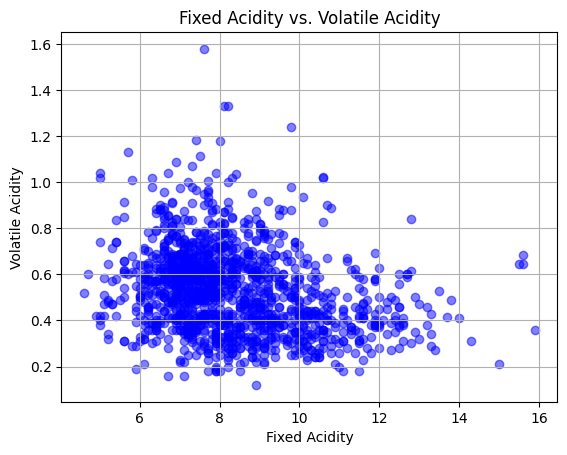

Correlation between Fixed Acidity and Volatile Acidity: -0.2536702943445563


In [21]:
wine.scatter_plot('blue',0,1)

<p>The graph above shows a visual representation of the fixed acidity of red wine against its volatile acidity properties.<br>
    The correlation between the two properties is calculated below the figure.
</p>

<p>The correlation is -0.25 (in 2 decimal places).<br>This means that for a slight increase in the value of fixed acidity, there will be a decrease in the volatile acidity and vice versa</p>

#### 2. This is a pie chart to aid in analysing the quality of the red wine from the population of samples in the dataset
<hr>

quality
5.0    578
6.0    534
7.0    167
4.0     53
8.0     17
3.0     10
5.6      1
Name: count, dtype: int64
The distubution of the sample in percentage is ['42.5%', '39.26%', '12.28%', '3.9%', '1.25%', '0.74%', '0.07%']


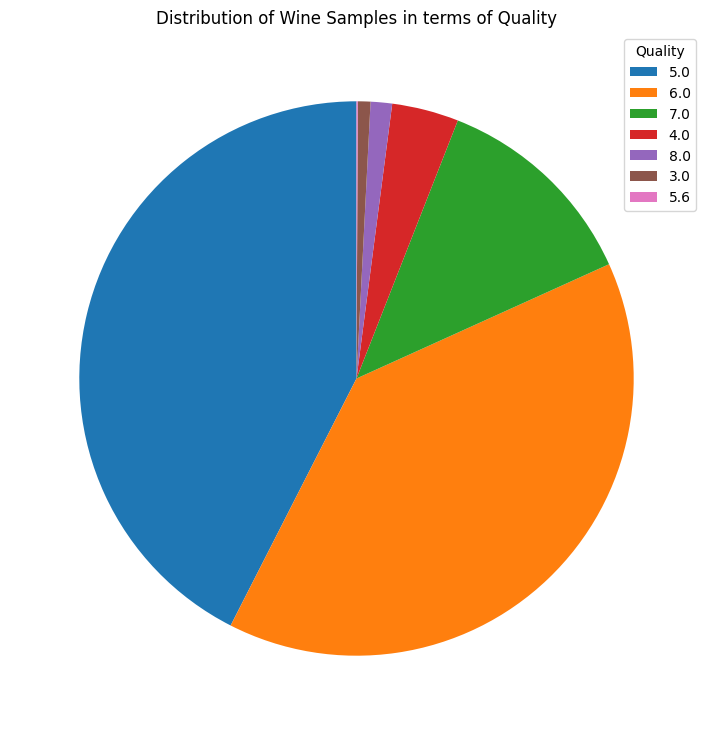

In [22]:
wine.pieChart_plot('quality')

<p>
    The analysis of the 1360 samples in terms of percentages is given by the list above. 
    While the pie chart gives a visual representation.
    It can be deduced from the chart and from the list that::</p>

    - About 43% of the samples have a quality of 5.
    - About 40% have a quality of 6.
    - About 12% have a quality of 7.
    


#### 3. A histogram to show distibution of alchol content

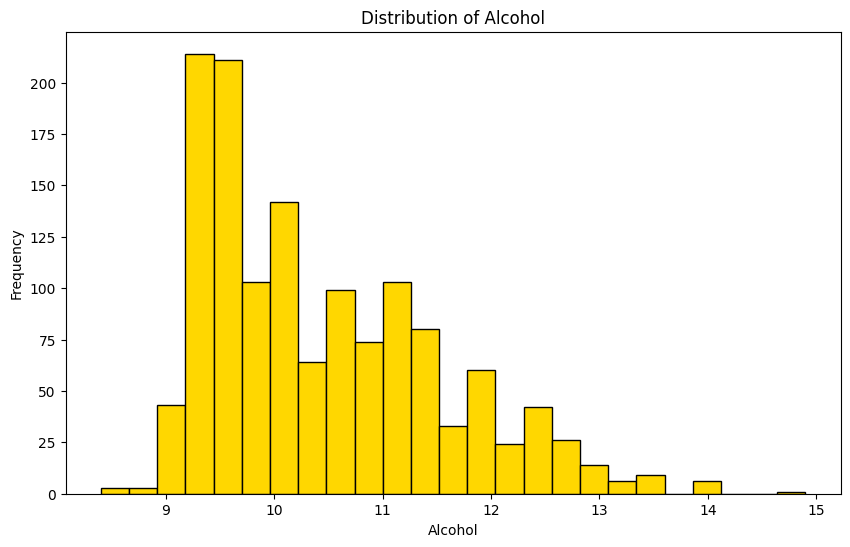

In [23]:
wine.histogram_plot('alcohol','gold')

<p>This histogram shows a distribution of the alcohol content in the red wine sample.<br>
    It can be seen that the majority of the red wine samples have alcohol values ranging from 9-10
</p>

## <u>CONCLUSION<u>

<p>In this project, i employed the serivices of the matplotlib, the numpy and the pandas python libraries.<br>
    In accordance to the Object Oriented Programming(O.O.P) approach, methods were created to work out, clean, visualize  and analyse a dataset from red wine samples. <br>
    The Methods include:
</p>

    - Previewing the data(first nth rows, last nth rows and descriptive information)
    - Cleaning the data (checking for and removing duplicates and filling up the missing (non-null or NaN) values with either mean or median depending on the user's preference.
    -Plotting (three plots- histogram, pie chart, and a scatter plot between the columns in the dataset to help visualization and numerical analysis.
    
    
